# **Análisis predictivo**
Antes de empezar cualquier análisis hay que asegurar que las librerías básicas y de uso general (numpy, pandas, etc.) están correctamente importadas.

In [130]:
# carga de datos
import time
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

Cargamos todas las librerias necesarias para nuestro estudio

In [131]:
# machine learning
from feature_selector import FeatureSelector # Nos va a ayudar a realizar el número de missings, correlaciones, importancia de las variables, etc.

# machine learning

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Import models from scikit learn module:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.utils import resample,shuffle

In [132]:
import time
import collections

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [133]:
!pip install nltk

In [135]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# **Carga de Datos**
En primer lugar cargamos los datos dentro del entorno con las funcionalidades que nos permite Google Colab una vez listos desde la etapa anterior.

In [139]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
df = pd.read_excel("/content/Terrorismo_limpio.xlsx")

In [140]:
data_1="Terrorismo_limpio"
df = pd.read_excel(data_1 + ".xlsx", header=0, parse_dates=False, index_col=0)

Se realiza un filtro para la región objeto de estudio

In [141]:
from numpy.core.multiarray import concatenate
d = df[df['región_txt']=='Sub-Saharan Africa']

In [142]:
# Display up to 150 rows and columns
pd.set_option('display.max_rows', 220)
pd.set_option('display.max_columns', 150)

# Set the figure size for plots
mpl.rcParams['figure.figsize'] = (14.6, 9.0)

# Set the Seaborn default style for plots
sns.set()

# Set the color palette
sns.set_palette(sns.color_palette("muted"))

In [143]:
d.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14131 entries, 1971 to 2019
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   mes                  14131 non-null  int64 
 1   día                  14131 non-null  int64 
 2   país_txt             14131 non-null  object
 3   región_txt           14131 non-null  object
 4   ciudad               14131 non-null  object
 5   latitud              14131 non-null  int64 
 6   longitud             14131 non-null  int64 
 7   crit                 14131 non-null  int64 
 8   multiple             14131 non-null  int64 
 9   éxito                14131 non-null  int64 
 10  suicidio             14131 non-null  int64 
 11  tipodeataque_txt     14131 non-null  object
 12  tipoobjetivo         14131 non-null  object
 13  nacionalidadvictima  14131 non-null  object
 14  organizacion         14131 non-null  object
 15  tipoarmamento        14131 non-null  object
 16  mu

In [144]:
d.drop(['motivo','sumario'], axis=1, inplace = True)


In [145]:
d_t = d[d['país_txt'] == "Nigeria"].query('2000<año<=2019')

d_t.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3741 entries, 2001 to 2019
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   mes                  3741 non-null   int64 
 1   día                  3741 non-null   int64 
 2   país_txt             3741 non-null   object
 3   región_txt           3741 non-null   object
 4   ciudad               3741 non-null   object
 5   latitud              3741 non-null   int64 
 6   longitud             3741 non-null   int64 
 7   crit                 3741 non-null   int64 
 8   multiple             3741 non-null   int64 
 9   éxito                3741 non-null   int64 
 10  suicidio             3741 non-null   int64 
 11  tipodeataque_txt     3741 non-null   object
 12  tipoobjetivo         3741 non-null   object
 13  nacionalidadvictima  3741 non-null   object
 14  organizacion         3741 non-null   object
 15  tipoarmamento        3741 non-null   object
 16  mue

In [146]:
d_tt= d_t.reset_index()

In [55]:
d_t=d.reset_index()

In [147]:
d_tt.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3741 entries, 0 to 3740
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   año                  3741 non-null   int64 
 1   mes                  3741 non-null   int64 
 2   día                  3741 non-null   int64 
 3   país_txt             3741 non-null   object
 4   región_txt           3741 non-null   object
 5   ciudad               3741 non-null   object
 6   latitud              3741 non-null   int64 
 7   longitud             3741 non-null   int64 
 8   crit                 3741 non-null   int64 
 9   multiple             3741 non-null   int64 
 10  éxito                3741 non-null   int64 
 11  suicidio             3741 non-null   int64 
 12  tipodeataque_txt     3741 non-null   object
 13  tipoobjetivo         3741 non-null   object
 14  nacionalidadvictima  3741 non-null   object
 15  organizacion         3741 non-null   object
 16  tipoar

Se procede a crear una nueva columna con los datos de las columnas 'año','mes' y 'dia'

In [56]:
d_t.rename(columns ={'año':'year','mes':'month','día':'day'}, inplace = True)

In [57]:
d_t['fecha']=pd.to_datetime(d_t[['year','month','day']])

In [58]:
d_t.to_excel('Terrorismo_limpio_final.xlsx', index = False)

In [148]:
d_tt.rename(columns ={'año':'year','mes':'month','día':'day'}, inplace = True)

In [149]:
d_tt['fecha']=pd.to_datetime(d_tt[['year','month','day']])

In [150]:
d_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3741 entries, 0 to 3740
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year                 3741 non-null   int64         
 1   month                3741 non-null   int64         
 2   day                  3741 non-null   int64         
 3   país_txt             3741 non-null   object        
 4   región_txt           3741 non-null   object        
 5   ciudad               3741 non-null   object        
 6   latitud              3741 non-null   int64         
 7   longitud             3741 non-null   int64         
 8   crit                 3741 non-null   int64         
 9   multiple             3741 non-null   int64         
 10  éxito                3741 non-null   int64         
 11  suicidio             3741 non-null   int64         
 12  tipodeataque_txt     3741 non-null   object        
 13  tipoobjetivo         3741 non-nul

In [64]:
d_tt.to_excel('Terrorismo_limpio_final.xlsx', index = False)

In [151]:
# Group by incident_date
d_ataques = d_tt.groupby(['fecha'], as_index = False).count()

# Select incident_date and a column for the counts
d_ataques = d_ataques[['fecha', 'day']]
d_ataques.columns = ['fecha','day']
d_ataques.head()

,fecha,day
0,2001-06-27,1
1,2001-08-19,1
2,2001-12-17,1
3,2001-12-23,1
4,2002-09-22,1


In [152]:
idx = pd.date_range('2000-01-01', '2019-12-31')

nig_d = d_ataques.set_index('fecha')

nig_d = nig_d.reindex(idx, fill_value=0)
nig_d.head()

,day
2000-01-01,0
2000-01-02,0
2000-01-03,0
2000-01-04,0
2000-01-05,0


In [153]:
nig_d.describe()

,day
count,7305.000000
mean,0.512115
std,1.354437
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,25.000000


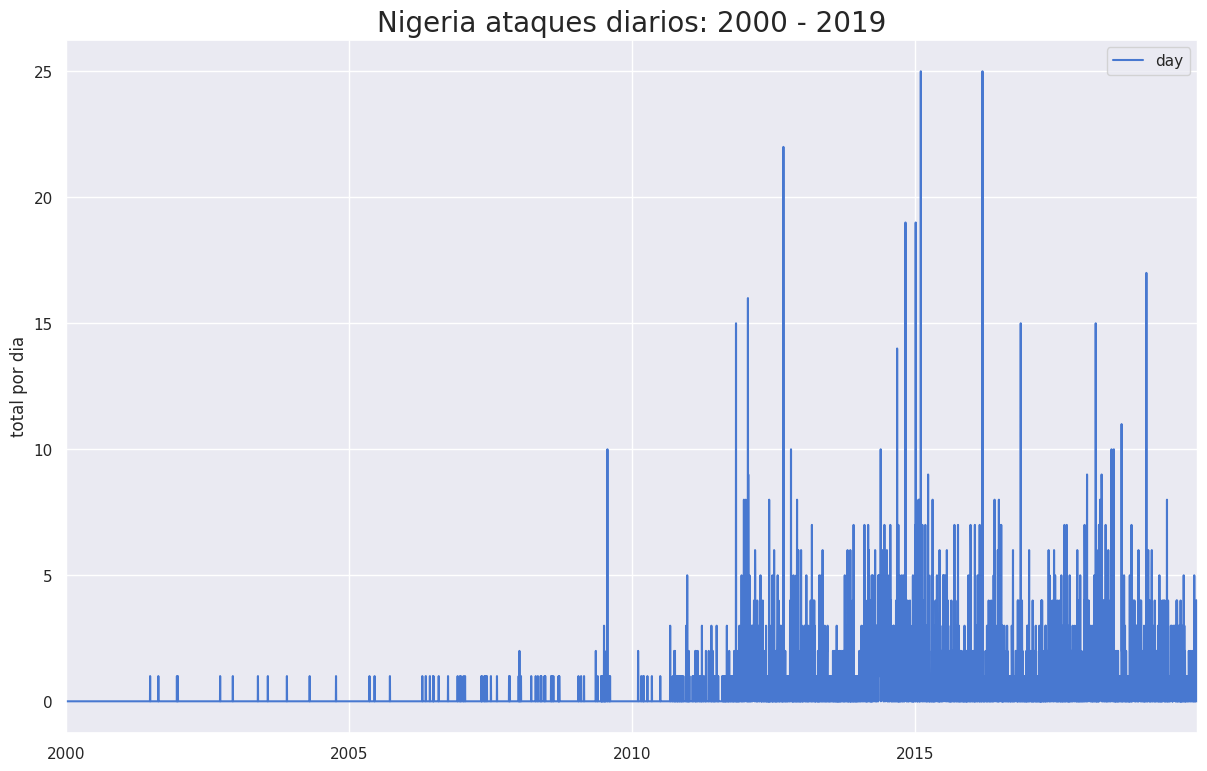

In [154]:
nig_d.plot()
plt.title('Nigeria ataques diarios: 2000 - 2019', fontsize=20);
plt.ylabel('total por dia')
plt.show();

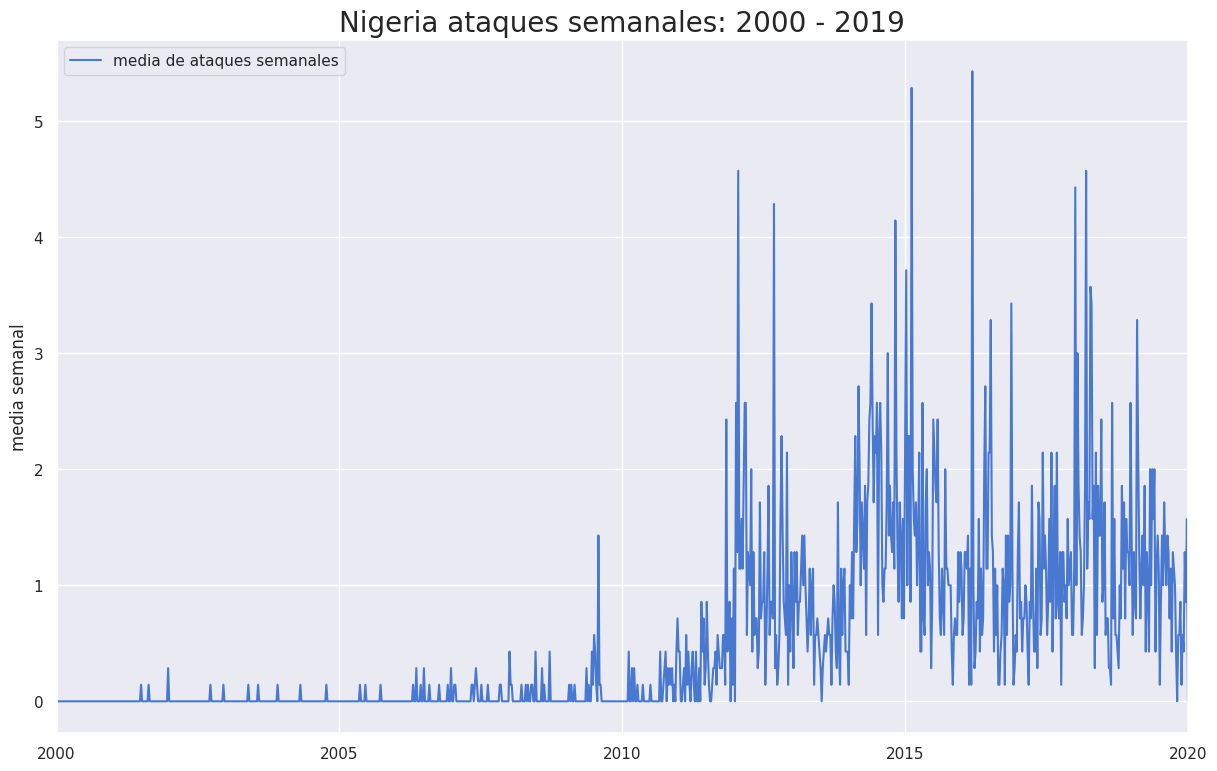

In [155]:
weekly_summary = pd.DataFrame()
weekly_summary['media de ataques semanales'] = nig_d.day.resample('W').mean()

weekly_summary.plot()
plt.title('Nigeria ataques semanales: 2000 - 2019', fontsize=20);
plt.ylabel('media semanal')
plt.show();

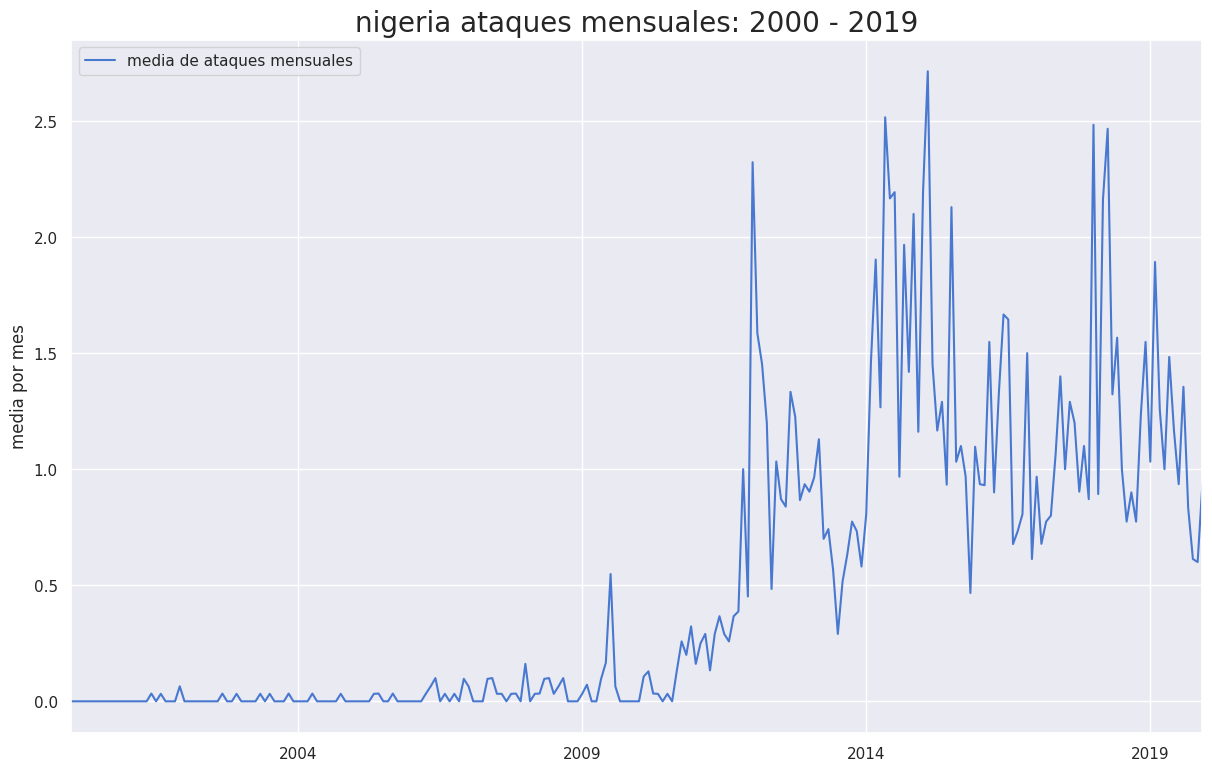

In [156]:
monthly_summary = pd.DataFrame()
monthly_summary['media de ataques mensuales'] = nig_d.day.resample('M').mean()

monthly_summary.plot()
plt.title('nigeria ataques mensuales: 2000 - 2019', fontsize=20);
plt.ylabel('media por mes')
plt.show();

In [157]:
# Use a 30 day span for averaging
nig_ewm = nig_d.ewm(span=30, adjust=False).mean()

nig_ewm.head()

,day
2000-01-01,0.0
2000-01-02,0.0
2000-01-03,0.0
2000-01-04,0.0
2000-01-05,0.0


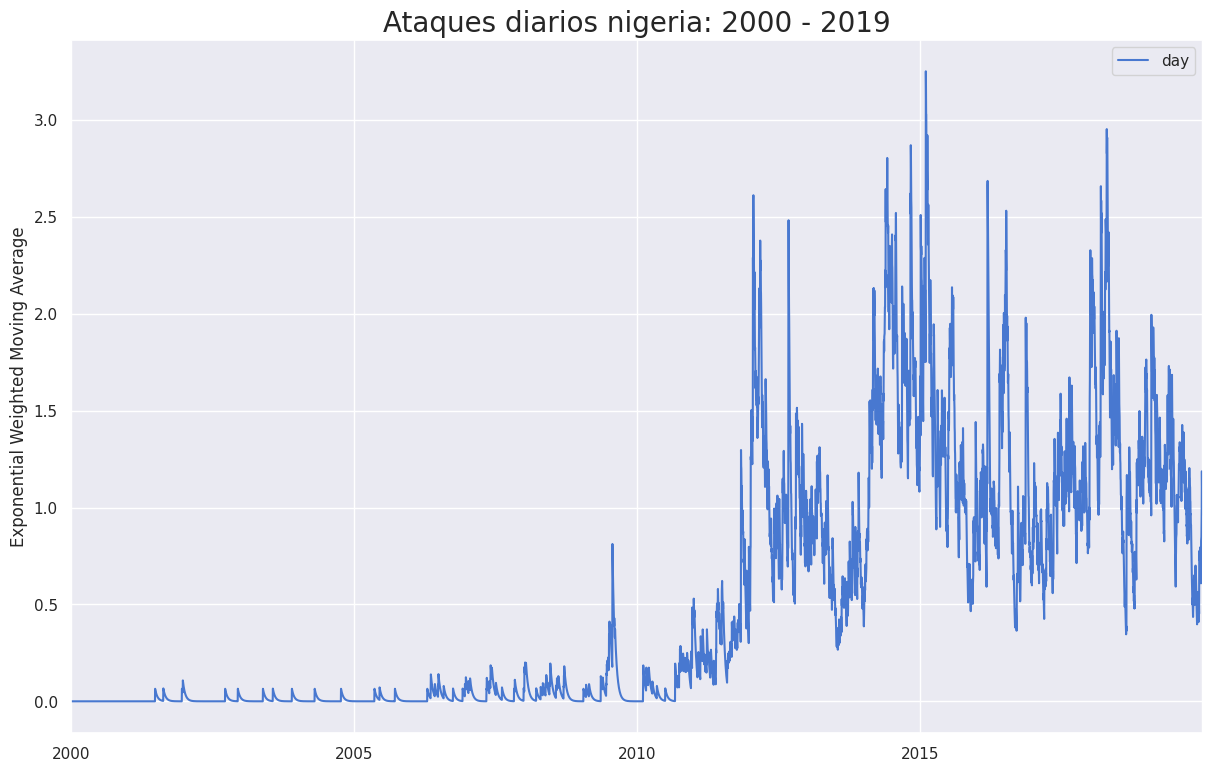

In [158]:
nig_ewm.plot()
plt.title('Ataques diarios nigeria: 2000 - 2019', fontsize=20);
plt.ylabel('Exponential Weighted Moving Average')
plt.show();

In [159]:
!pip install prophet

import prophet

In [160]:
import prophet

nig_fb = nig_d.copy()
nig_fb['index1'] = nig_fb.index
nig_fb.columns = ['y', 'ds']

nig_fb.head()

,y,ds
2000-01-01,0,2000-01-01
2000-01-02,0,2000-01-02
2000-01-03,0,2000-01-03
2000-01-04,0,2000-01-04
2000-01-05,0,2000-01-05


Procedo a cargar el calendario de festivos

In [165]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
df = pd.read_excel("/content/festividades nigeria.xlsx")

In [166]:
data_1="festividades nigeria"
d_vacas = pd.read_excel(data_1 + ".xlsx", header=0, parse_dates=False, index_col=0)

In [167]:
d_vacaciones= d_vacas.reset_index()
d_vacaciones.head()

,ds,holiday
0,2018-01-01,New Year's Day
1,2018-02-14,Valentine's Day
2,2018-02-17,Ash Wednesday
3,2018-03-08,Women's Day
4,2018-03-14,Mothering Sunday


In [168]:
prophet1 = prophet.Prophet(changepoint_prior_scale=0.15, holidays=d_vacaciones)
prophet1.fit(nig_fb)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7k801k76/qmq_vwg4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7k801k76/da8ukbn0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17955', 'data', 'file=/tmp/tmp7k801k76/qmq_vwg4.json', 'init=/tmp/tmp7k801k76/da8ukbn0.json', 'output', 'file=/tmp/tmp7k801k76/prophet_model6cg8pt74/prophet_model-20230902110910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [169]:
prophet1 = prophet.Prophet(growth='linear')
prophet1.fit(nig_fb)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7k801k76/ofwbxczy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7k801k76/kerppjqy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88301', 'data', 'file=/tmp/tmp7k801k76/ofwbxczy.json', 'init=/tmp/tmp7k801k76/kerppjqy.json', 'output', 'file=/tmp/tmp7k801k76/prophet_modelqu46a9ov/prophet_model-20230902110915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [170]:
# Specify 365 days out to predict
future_data = prophet1.make_future_dataframe(periods=365, freq = 'D')

# Predict the values
forecast_data = prophet1.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#forecast_data.tail()

,ds,yhat,yhat_lower,yhat_upper
7665,2020-12-26,1.073853,-0.522975,2.605701
7666,2020-12-27,1.286786,-0.246472,2.882911
7667,2020-12-28,1.239339,-0.372276,2.685638
7668,2020-12-29,1.185233,-0.493261,2.614594
7669,2020-12-30,1.231948,-0.409586,2.806662


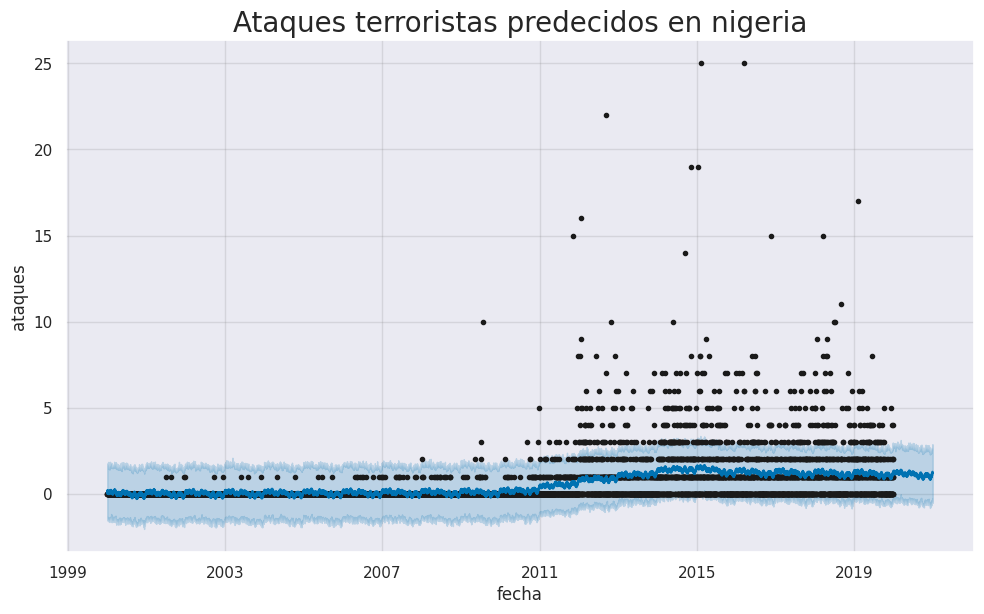

In [171]:
prophet1.plot(forecast_data, xlabel = 'fecha', ylabel = 'ataques')
plt.title('Ataques terroristas predecidos en nigeria', fontsize=20);
plt.show();

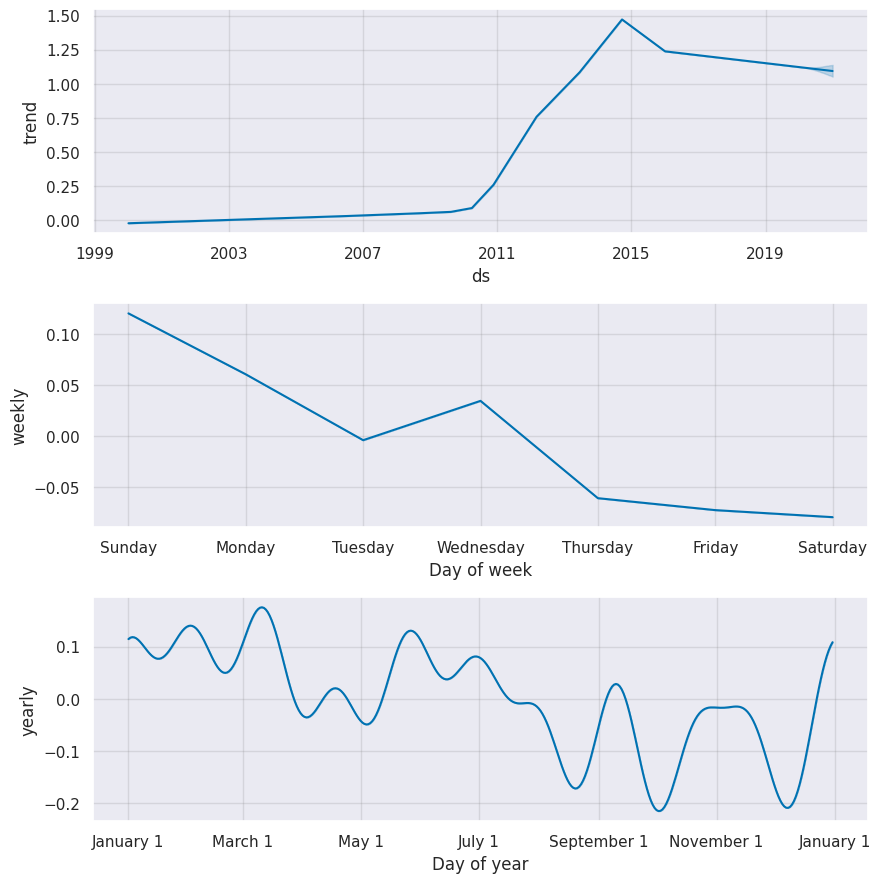

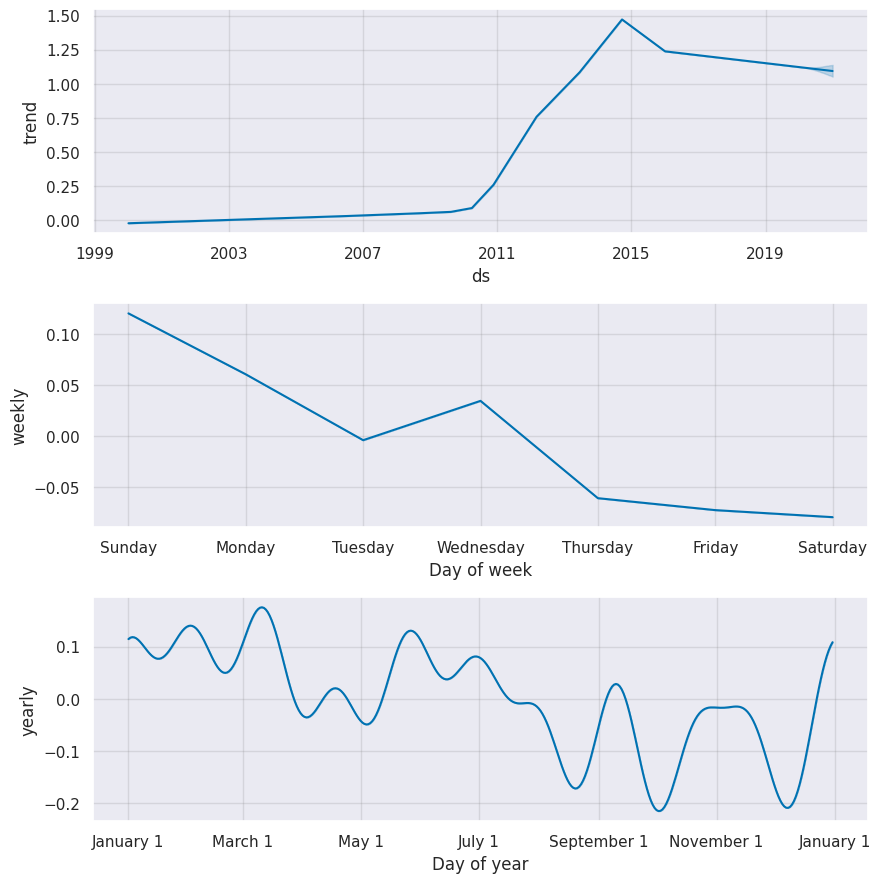

In [172]:
prophet1.plot_components(forecast_data)

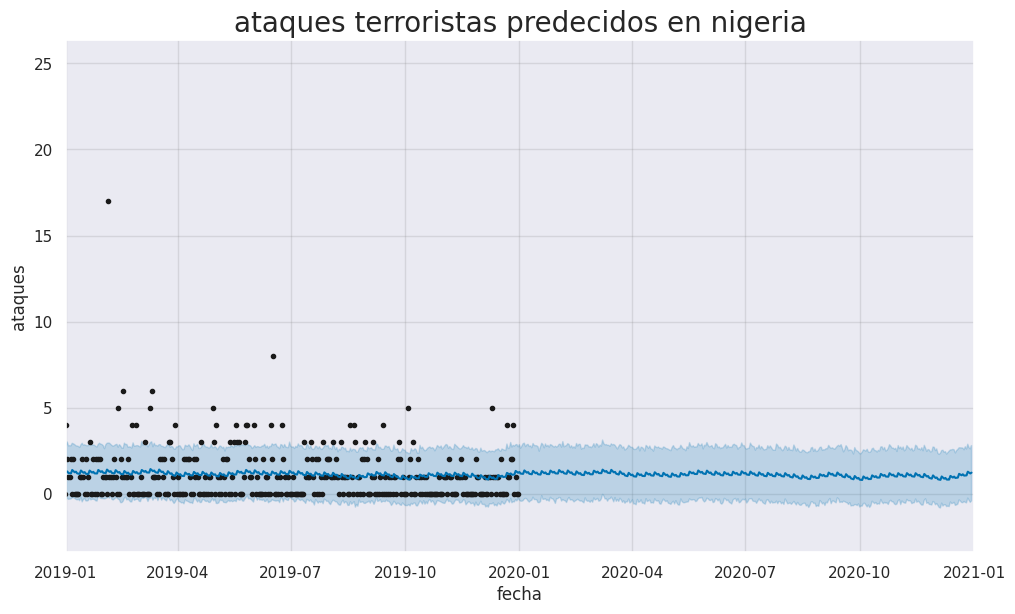

In [173]:
prophet1.plot(forecast_data, xlabel = 'fecha', ylabel = 'ataques')
plt.title('ataques terroristas predecidos en nigeria', fontsize=20);
plt.xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2021-01-01'))
plt.show();

In [174]:
future3 = prophet1.make_future_dataframe(periods=360)
forecast3 = prophet1.predict(future3)
forecast3["estaciones"] = np.exp(forecast3.yhat).round()
forecast3["estaciones_lower"] = np.exp(forecast3.yhat_lower).round()
forecast3["estaciones_upper"] = np.exp(forecast3.yhat_upper).round()
forecast3[(forecast3.ds > "10-1-2020") &
          (forecast3.ds < "11-30-2020")][["ds", "yhat", "estaciones",
                                        "estaciones", "estaciones_upper"]]

,ds,yhat,estaciones,estaciones,estaciones_upper
7580,2020-10-02,0.813739,2.0,2.0,10.0
7581,2020-10-03,0.807707,2.0,2.0,11.0
7582,2020-10-04,1.009737,3.0,3.0,13.0
7583,2020-10-05,0.955138,3.0,3.0,12.0
7584,2020-10-06,0.897571,2.0,2.0,13.0
7585,2020-10-07,0.944373,3.0,3.0,12.0
7586,2020-10-08,0.859082,2.0,2.0,11.0
7587,2020-10-09,0.858345,2.0,2.0,11.0
7588,2020-10-10,0.863270,2.0,2.0,11.0
7589,2020-10-11,1.074753,3.0,3.0,13.0
